# 1.0 Soluciones de las ecuaciones de una variable

[![Open In Colab](./imagenes/colab-badge.png)](https://colab.research.google.com/github/caramirezs/MetNum_librodigital/blob/master/1_Ecuaciones_de_una_variable/1.0_Soluciones_ecuaciones_una_variable.ipynb)

In [9]:
# EJECUTAR ESTA CELDA
# Librerias y Funciones iniciales
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def graficar(f, x_i, x_f, num=1000):
    """
    Gráfica de funciones algebraicas
    :param f: función, previamente definida
    :param x_i: límite inferior del intervalo
    :param x_f: límite superior del intervalo
    :param num: división del intervalo
    :return: figura y objeto de ejes para la gráfica de la función
    """
    sns.set_style('darkgrid') # Agrega el estilo "dark" de Seaborn
    # Crea un arreglo de valores x equiespaciados entre x_i y x_f con una longitud de num.
    x = np.linspace(x_i, x_f, num)
    # Crea una figura y un objeto de ejes (axis) utilizando matplotlib.
    # figsize se utiliza para establecer el tamaño de la figura.
    fig, ax = plt.subplots(figsize=(20,8))
    # Grafica la función f(x) en el objeto de ejes creado anteriormente.
    ax.plot(x, f(x))
    # Obtiene los límites inferior y superior de x y y de los ejes del objeto de ejes.
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    # Agrega flechas a los ejes x e y para indicar su dirección.
    ax.annotate("", xy=(xmax, 0), xytext=(xmin, 0), arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10))
    ax.annotate("", xy=(0, ymax), xytext=(0, ymin), arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10))
    # Devuelve la figura y el objeto de ejes para que puedan ser manipulados y mostrados según se desee.
    return fig, ax

## Introducción a ecuaciones de una variable

Antes de ahondar en la solución de ecuaciones de una variable, es importante entender su relevancia en la ciencia y la ingeniería. En muchas situaciones es necesario encontrar la raíz de una ecuación, es decir, el valor de la variable que hace que la ecuación sea igual a cero. Por ejemplo, en la física, podemos necesitar encontrar la velocidad de escape de un cohete para que pueda salir de la gravedad terrestre, y esto se puede hacer encontrando la raíz de una ecuación. En la ingeniería eléctrica, podemos necesitar encontrar el valor de la corriente que pasa por un circuito para garantizar su correcto funcionamiento, y nuevamente, esto se puede hacer encontrando la raíz de una ecuación.

En algunos casos, las ecuaciones son sencillas y se pueden resolver fácilmente, como en el caso de la ecuación cuadrática, recordemos como en los cursos de matemáticas fundamentales se soluciona este tipo de ecuaciones de la forma $ax^2 + bx + c = 0$, que se puede resolver con la *fórmula cuadrática*: $$x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$$
A los valores de la solución de la ecuación se les llama **raíces**, **ceros** o **cortes**.

Seguramente nos hemos encontrado con otras ecuaciones las cuales se conocen procesos algebraicos para solucionarlas, entre ellas pueden estar las ecuaciones lineales, exponenciales, trigonométricas, entre otras. Sin embargo, en muchos casos, las ecuaciones son demasiado complejas para ser resueltas analíticamente. En estos casos, los métodos numéricos son una herramienta poderosa para encontrar soluciones aproximadas.

> Recuerda: Encontrar raíces o ceros de las funciones es parte fundamental en la práctica del desarrollo de actividades relacionadas con ciencia e ingenieria.

En este capítulo, nos centraremos en los métodos numéricos para encontrar las raíces de ecuaciones de una variable. Comenzaremos con los métodos cerrados, que aprovechan el hecho de que una función contínua cambia de signo cerca de su raíz, para encontrar una raíz en un intervalo cerrado. Luego, exploraremos los métodos abiertos, que pueden encontrar una raíz a partir de un valor arbitrario.

Para ilustrar el uso de los métodos numéricos, consideremos el siguiente ejemplo. Supongamos que estamos diseñando un puente y necesitamos saber la cantidad máxima de peso que puede soportar una viga de concreto. Sabemos que la carga máxima que la viga puede soportar está dada por la ecuación $f(x) = x^3 - 5x^2 + 10x - 15$, donde $x$ es la longitud de la viga en metros y $f(x)$ es la carga máxima en toneladas que puede soportar. Queremos encontrar la longitud de la viga que maximice la carga que puede soportar.

En este ejemplo, no podemos resolver analíticamente la ecuación $f(x) = 0$ para encontrar la raíz correspondiente a la longitud de la viga que maximiza la carga. Sin embargo, podemos utilizar los métodos numéricos para encontrar una solución aproximada.

En general, muchos modelos dan como resultados de ecuaciones cuyas soluciones no son sencillas de determinar, o simplemente no se pueden encontrar de manera analítica.

> Observación: En adelante, para resolver una ecuación es *necesario* que esté igualada a cero, es decir, de la forma $f(x) = 0$, lo cual equivale a encontrar los ceros de $f(x)$.

> Ejemplo: Encotrar las soluciones de la ecuación $\cos(x^2) - 3x = \sin^2(x) -2x^2$ es lo mismo que solucionar la ecuación $\cos(x^2) - 3x - \sin^2(x) + 2x^2 = 0$, de tal manera que $f(x) = \cos(x^2) - 3x - \sin^2(x) + 2x^2$

El error es una realidad presente en cualquier tipo de cálculo numérico y se refiere a la diferencia entre el valor exacto y el valor aproximado obtenido mediante un método numérico. En el contexto de la solución de ecuaciones, el error se puede dividir en dos tipos: el error absoluto y el error relativo. La comprensión del error es crucial para determinar la precisión y la confiabilidad de las soluciones obtenidas. Antes de abordar los diferentes métodos, hablaremos sobre los diferentes tipos de error.

## Error de truncamiento y de redondeo
El error es una parte inevitable del proceso de medición y cálculo. En la ingeniería, el cálculo preciso es esencial para garantizar la seguridad y el éxito de los proyectos. Por lo tanto, es importante comprender los diferentes tipos de errores que pueden surgir durante los cálculos.

En el ámbito de los métodos numéricos, el error de truncamiento es un tipo de error que surge debido a la necesidad de truncar o aproximar un número infinito o una serie infinita en un número finito de operaciones aritméticas, es decir, son aquellos que resultan al usar una aproximación en lugar de un procedimiento matemático exacto. Este tipo de error se produce porque los algoritmos utilizados en los métodos numéricos no pueden manejar números infinitos o series infinitas, y por lo tanto, deben truncar o aproximar los valores de entrada para producir una solución numérica. El error de truncamiento se produce debido a la limitación de los recursos informáticos utilizados en los cálculos numéricos y puede ser reducido mediante la utilización de algoritmos más precisos o mediante el aumento de la cantidad de recursos informáticos disponibles.

Por otro lado, el error de redondeo se produce cuando se aproxima un número al *redondear* los dígitos decimales. Por ejemplo, si se toma el número $\frac{1}{3}$ y se lo aproxima a 0.333, el error de redondeo es la diferencia entre el valor real y el valor aproximado, que es de aproximadamente 0.000333. Este tipo de error se puede minimizar utilizando técnicas de redondeo adecuadas y una mayor cantidad de dígitos significativos en los cálculos.

Ambos tipos de errores son inevitables, pero se pueden minimizar utilizando técnicas adecuadas de aproximación y redondeo, y utilizando una mayor cantidad de dígitos significativos en los cálculos. En la ingeniería, estos errores pueden tener consecuencias graves, por lo que es importante tenerlos en minimizarlos en la medida de lo posible.

Por ejemplo, en el diseño de puentes, el error de truncamiento y/o redondeo puede llevar a una sobrecarga en el puente, lo que puede tener consecuencias graves en términos de seguridad. En la planificación de proyectos de construcción, el error de cálculo puede llevar a un presupuesto insuficiente o a una programación inadecuada. En la industria de la fabricación, el error de cálculo puede llevar a la producción de piezas defectuosas y costosas.

En resumen, el error de truncamiento y redondeo son tipos comunes de errores en los cálculos, que pueden tener consecuencias graves en la ingeniería. Es importante minimizar estos errores utilizando técnicas adecuadas de aproximación y redondeo, y una mayor cantidad de dígitos significativos en los cálculos.

## Error absoluto y relativo
El error es una medida de la diferencia entre el valor obtenido mediante un cálculo numérico y el valor real, exacto o teórico. Conocer el error en los cálculos numéricos es importante ya que nos indica la precisión de nuestras soluciones y si es necesario mejorarlas.

Se puede calcular el error de dos maneras, el error absoluto y el error relativo. El error absoluto es la diferencia entre el valor exacto y el valor aproximado, es decir, $E_a = |x - \hat{x}|$. Mientras que el error relativo es la relación entre el error absoluto y el valor exacto, es decir, $E_r = \frac{E_a}{|x|}$.

En la solución de ecuaciones con métodos numéricos, es importante conocer estos errores, ya que nos permiten evaluar la precisión de la solución obtenida y decidir cuándo es suficiente. Un error absoluto pequeño indica que la solución obtenida es muy cercana a la solución exacta, lo que indica una alta precisión. Por otro lado, un error relativo pequeño indica que la solución obtenida es muy cercana al valor real, independientemente de si es una solución exacta o no.

Por ejemplo, en la ingeniería civil, al calcular la carga máxima que una estructura puede soportar, es importante conocer el error absoluto para asegurarnos de que la carga máxima calculada esté dentro de los límites seguros de la estructura. Además, el error relativo es importante en la evaluación de la precisión de los modelos de simulación utilizados para predecir el comportamiento de la estructura bajo diferentes condiciones. De esta manera, se puede ajustar el modelo para lograr una mayor precisión en la predicción.

## Método gráfico

Como preámbulo, para aproximar las soluciones de la ecuación $f(x)=0$ se puede iniciar analizando su gráfica para representar tanto la funciones como sus raíces (los cortes con el eje $x$). Comenzaremos explorando los métodos gráficos para obtener una aproximación a la raíz de la ecuación $f(x)=0$

Un método simple para obtener una aproximación de la raíz de la ecuación $f(x) = 0$ consiste en graficar la función sobre un intervalo $[a,b]$ y observar dónde cruza el eje $x$. El valor de $x$ en el punto de intersección de la función con el eje representa una solución aproximada de la ecuación $f(x) = 0$.

Aunque las técnicas gráficas tienen una precisión limitada, pueden ser útiles para obtener una aproximación inicial de la raíz y luego utilizar un método más preciso para refinar la solución. Es decir, estas aproximaciones pueden servir como valores iniciales para otros métodos numéricos que veremos más adelante.

En la primera sección de este capítulo se presenta un código para definir la función graficar, la cual realiza la gráfica de una función $f$ sobre un intervalo $[x_i, x_f]$. A continuación, se muestran algunos ejemplos de cómo utilizar este método.

### Ejemplo 1
Determinar las soluciones de la ecuación $e^x - 3 \sin(x) = 3x$ con el método gráfico.

#### Solución
Lo primero que se debe hacer es igualar a cero y definir la función: $f(x) = e^x - 3 \sin(x) - 3x$. 
Luego construimos la función en Python, podemos hacerlo utilizando con la expresión `lamnda` y con la librería `numpy`.

> Observación: Al incio de este cuaderno declaramos que íbamos a utilizar la librería numpy, mediante el comando `import numpy as np`

Finalmente, escogemos un intervalo y graficamos. El intervalo seleccionado es $[-0.2, 2.5]$.

(<Figure size 2000x800 with 1 Axes>, <Axes: >)

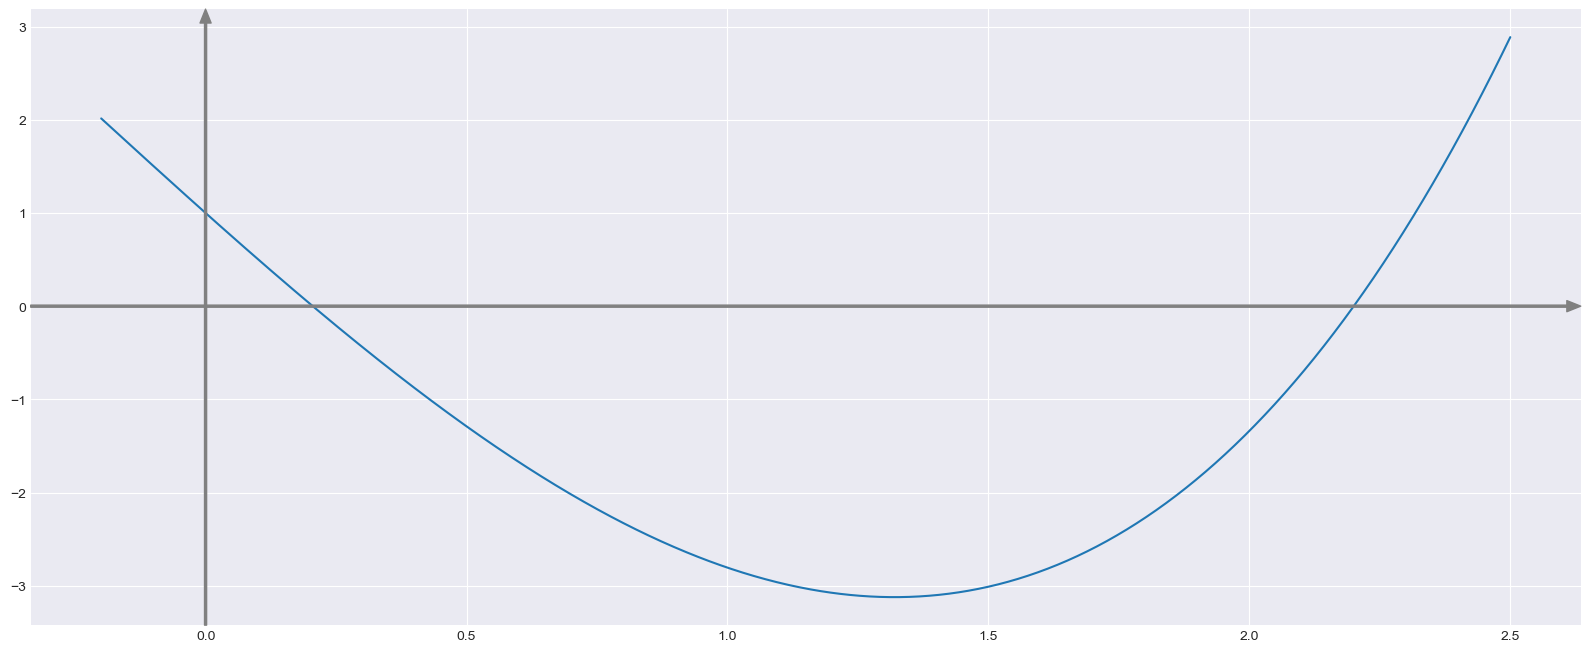

In [10]:
# Construcción de la función a analizar
f = lambda x: np.e**x - 3*np.sin(x) - 3*x
# Se realiza la gráfica de la función en el intervalo dado
graficar(f, -0.2, 2.5)

En la gráfica anterior podemos identificar dos raíces de la función $f(x)$ cerca de 0.2 y 2.2 respectivamente, en otras palabras, en el intervlalo $[-0.2, 2.5]$ hay dos soluciones de la ecuación $e^x - 3 \sin(x) = 3x$.

Notemos que este método no nos permite realmente identificar las soluciones de la función, sino darnos una idea de donde están y tener una *imprecisa* aproximación de estas.

### Ejemplo 2
Consideremos la ecuación $g(x) = \sin(x) - \frac{x}{2} = 0$. Primero, graficamos la función $f(x)$ sobre el intervalo $[-2\pi, 2\pi]$:

(<Figure size 2000x800 with 1 Axes>, <Axes: >)

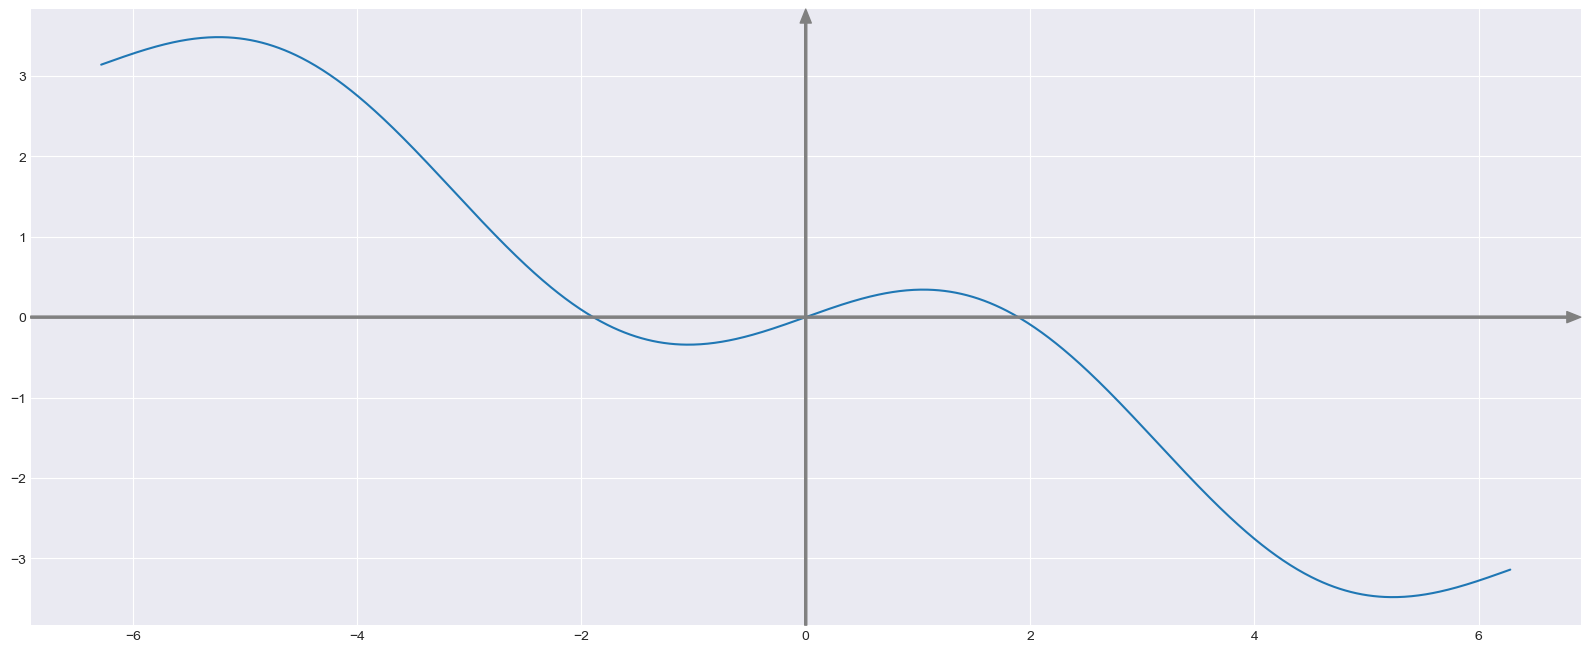

In [22]:
g = lambda x: np.sin(x) - x/2
graficar(g, -2*np.pi, 2*np.pi)

Observamos que la función $g(x)$ cruza el eje $x$ en los puntos $x \approx -1.9$, $x = 0$ y $x \approx 1.9$. Por lo tanto, podemos decir que las soluciones aproximadas de la ecuación son $x_1 \approx -1.9$, $x_2  = 0$ y $x_3 \approx 1.9$.

### Ejemplo 3
Consideremos la ecuación $f(x) = \cos(x) - x^2 = 0$. Primero, graficamos la función $f(x)$ sobre el intervalo $[-2, 2]$:

(<Figure size 2000x800 with 1 Axes>, <Axes: >)

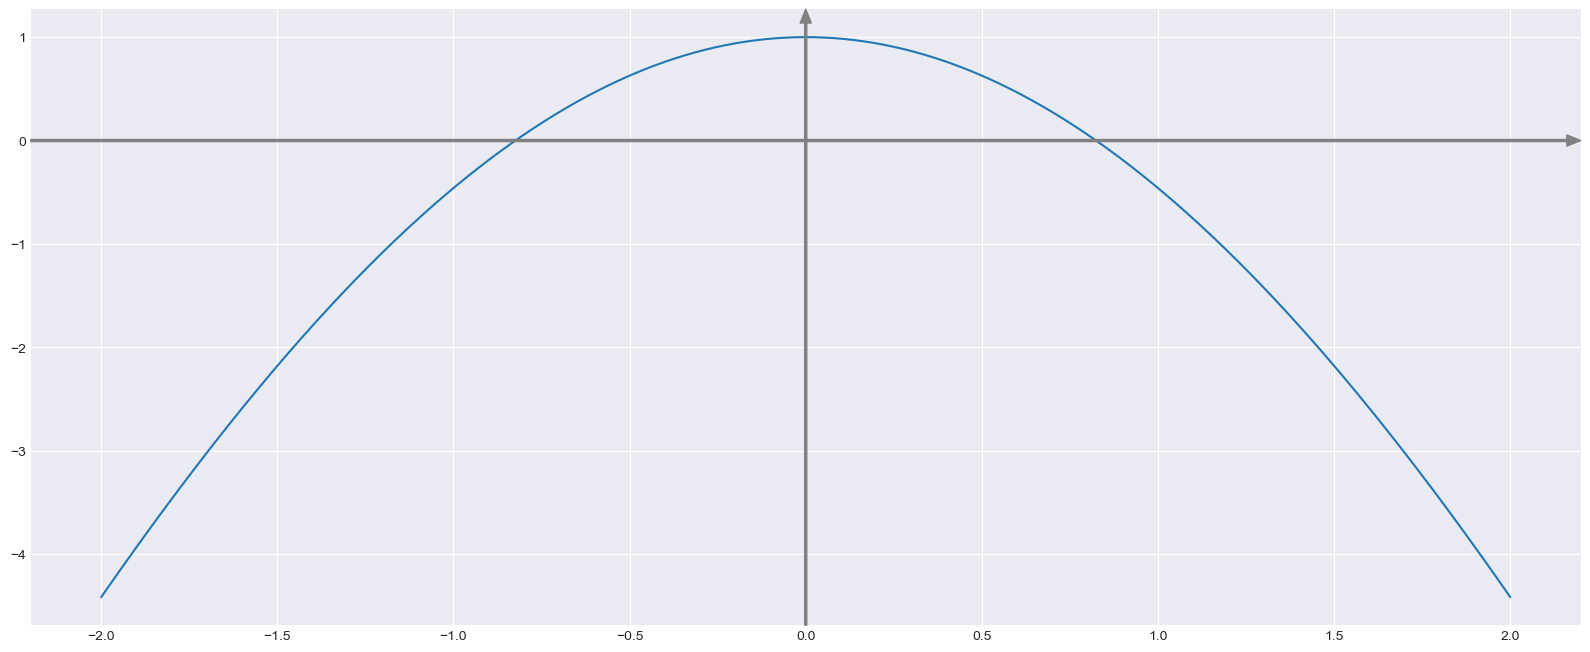

In [23]:
h = lambda x: np.cos(x) - x**2
graficar(h, -2, 2)

Observamos que la función $f(x)$ cruza el eje $x$ en los puntos $x \approx -0.8$ y $x \approx 0.7$. Por lo tanto, podemos decir que las soluciones aproximadas de la ecuación son $x_1 \approx -0.8$ y $x_2 \approx 0.7$.

### Conclusiones
- El método gráfico es una técnica sencilla y visual para encontrar soluciones aproximadas de una ecuación $f(x) = 0$.
- La gráfica de la función proporciona una representación visual de la función y de la relación entre los valores de $x$ y $f(x)$.
- Aunque el método gráfico es útil para obtener soluciones aproximadas, tiene una precisión limitada y no puede proporcionar soluciones exactas.
- El método gráfico puede ser utilizado para verificar la validez de una solución obtenida por otros métodos numéricos.

La importancia del método gráfico radica en que proporciona una comprensión visual de la función y permite la exploración de la relación entre los valores de $x$ y $f(x)$. Además, puede ser utilizado como una herramienta inicial para encontrar soluciones aproximadas de una ecuación antes de utilizar otros métodos numéricos más precisos. El método gráfico es útil para visualizar la función en un intervalo, ver la posición de las raíces y tener una idea aproximada de su número, además de ser una herramienta útil en la enseñanza de matemáticas y en la comprensión de las funciones en general.

### Ejercicios
Utilice el método gráfico para determinar las soluciones de las siguientes ecuaciones:

1. $f(x) = x^3 - 2x^2 - 11x + 12$: Esta función tiene tres raíces reales, las cuales se pueden encontrar graficando la función sobre un intervalo apropiado y buscando los puntos donde la gráfica cruza el eje x.

2. $f(x) = 0.5\sin(x) + x/2$: Esta función tiene al menos una raíz real, que se puede encontrar mediante una gráfica en un intervalo que incluya el punto donde la función corta al eje x.

3. $f(x) = e^x - 3x$: Esta función también tiene al menos una raíz real, que se puede encontrar mediante una gráfica en un intervalo que incluya el punto donde la función corta al eje x.